In [1]:
import numpy as np
import pandas as pd 
from tqdm import tqdm_notebook
import os
import sys
import datetime
import os.path
from calendar import monthrange

import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import rc
from cycler import cycler
import seaborn as sns
%matplotlib inline

from dateutil import rrule
from datetime import date
 
mpl.rcParams['axes.prop_cycle'] = cycler('color', ['#ff0000', '#0000ff',   '#00ffff','#ffA300', '#00ff00', 
     '#ff00ff', '#990000', '#009999', '#999900', '#009900', '#009999'])

rc('font', size=16)
# rc('font',**{'family':'serif','serif':['Computer Modern']})
rc('text', usetex=False)
rc('figure', figsize=(12, 10))
rc('axes', linewidth=.5)
rc('lines', linewidth=1.75)

pd.options.mode.chained_assignment = None  # default='warn'

In [2]:
sys.path.append("../src") # Adds directory to python modules path.
from models import utils
from data import distributions

In [3]:
train = utils.load_training(parse_dts=True)
items = utils.load_raw_data('items.csv')[['item_id', 'item_category_id']]
train = train.merge(items, how='left', on=['item_id'])

## Shops/Categories sales

In [4]:
shop_cat = train.groupby(['shop_id', 'item_category_id'])['item_cnt_day'].sum().unstack()
shop_cat = shop_cat.fillna(0.0)
cat_sells = shop_cat != 0.0

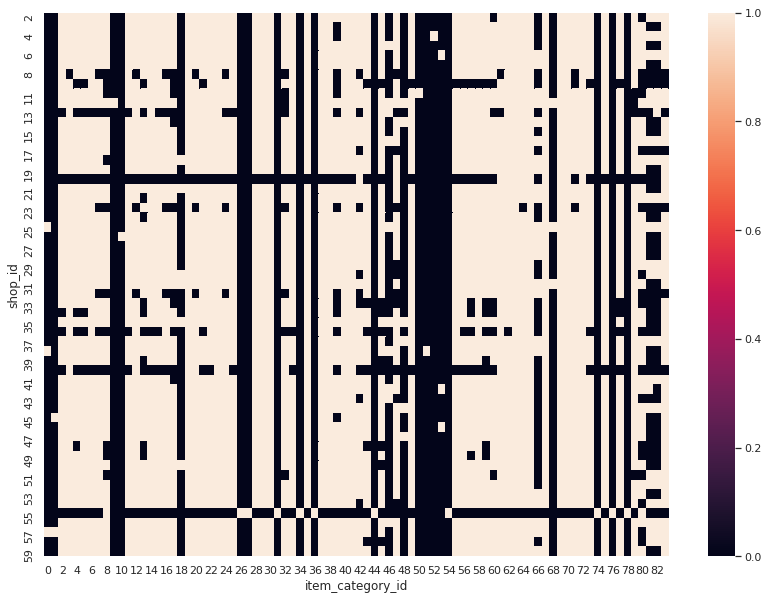

In [5]:
sns.set(rc={'figure.figsize':(14, 10)})
sns.heatmap(cat_sells)

In [6]:
# Find categories that are sold only in one shop
cat_shops = {
    c: list(cat_sells[c][cat_sells[c]].index)
    for c in cat_sells.columns
}
un_shops = {k: v for k, v in cat_shops.items() if len(v) == 1}
un_shops

{9: [12],
 10: [26],
 26: [55],
 27: [55],
 31: [55],
 34: [55],
 36: [55],
 44: [55],
 50: [11],
 51: [38],
 52: [4],
 54: [55],
 74: [55],
 76: [55],
 78: [55]}

## Target values

In [9]:
month_sales = train.groupby(['date_block_num', 'shop_id', 'item_id'])['item_cnt_day'].sum()
month_sales.name = 'item_cnt_month'
month_sales = month_sales.reset_index()

In [12]:
counts = month_sales['item_cnt_month'].value_counts()

In [13]:
neg_sales = counts[counts.index < 0]
big_sales = counts[counts.index > 20]

-1     883
-2      26
-4       2
-13      1
-22      1
-5       1
-6       1
Name: item_cnt_month, dtype: int64

In [14]:
print(len(month_sales[month_sales['']]))

21     832
22     719
23     668
24     538
25     524
26     475
27     428
28     408
29     364
30     340
32     297
31     294
33     246
34     228
35     222
36     201
38     185
37     183
39     165
40     151
42     136
44     126
43     124
41     123
46     120
45     111
47     108
48      98
49      97
50      87
      ... 
423      1
426      1
430      1
431      1
432      1
434      1
375      1
374      1
373      1
371      1
317      1
319      1
320      1
328      1
331      1
334      1
337      1
339      1
341      1
344      1
349      1
352      1
353      1
359      1
360      1
365      1
368      1
369      1
370      1
792      1
Name: item_cnt_month, Length: 418, dtype: int64